### Basic library imports

In [1]:
import os
import re
import pandas as pd


### Read Dataset

In [2]:
DATASET_FOLDER = '../dataset/'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

### Run Sanity check using src/sanity.py

In [3]:
!python3 sanity.py --test_filename ../dataset/sample_test.csv --output_filename ../dataset/sample_test_out.csv

Parsing successfull for file: ../dataset/sample_test_out.csv


In [4]:
!python3 sanity.py --test_filename ../dataset/sample_test.csv --output_filename ../dataset/sample_test_out_fail.csv

Error: Invalid unit [lbs] found in 6.75 lbs. Allowed units: {'inch', 'pint', 'gallon', 'volt', 'ton', 'millilitre', 'centimetre', 'metre', 'watt', 'kilogram', 'pound', 'gram', 'centilitre', 'cubic foot', 'fluid ounce', 'yard', 'microgram', 'milligram', 'litre', 'kilovolt', 'microlitre', 'cubic inch', 'imperial gallon', 'foot', 'kilowatt', 'quart', 'ounce', 'millivolt', 'decilitre', 'cup', 'millimetre'}


### Download images

In [20]:
import requests
from tqdm import tqdm 

def download_images(image_links, download_folder):
    os.makedirs(download_folder, exist_ok=True)
    
    for link in tqdm(image_links):
        img_name = os.path.join(download_folder, os.path.basename(link))
        try:
            response = requests.get(link, stream=True)
            if response.status_code == 200:
                with open(img_name, 'wb') as f:
                    f.write(response.content)
            else:
                print(f"Failed to download image from {link}")
        except Exception as e:
            print(f"Error downloading {link}: {e}")

download_images(sample_test['image_link'], '../images')

100%|██████████| 88/88 [00:40<00:00,  2.17it/s]


In [5]:
assert len(os.listdir('../images')) > 0, "No images were downloaded!"

### OCR extraction using EasyOCR

In [24]:
pip install --upgrade paddleocr opencv-python

Note: you may need to restart the kernel to use updated packages.


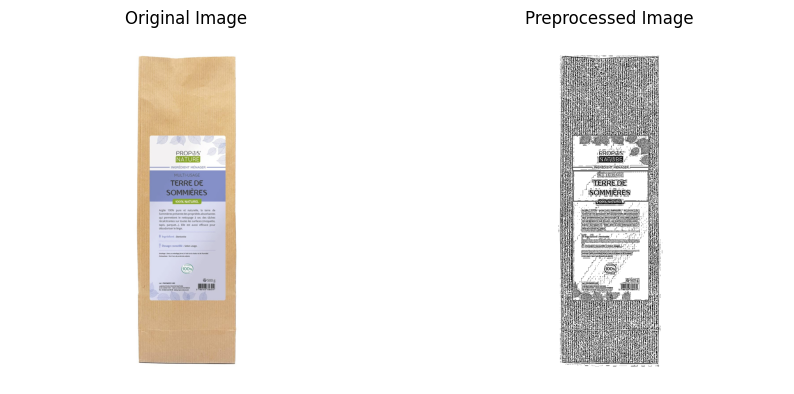

In [48]:
import cv2
import matplotlib.pyplot as plt

def preprocess_image(input_path):
    # Read image
    image = cv2.imread(input_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray)

    # Apply adaptive thresholding (Gaussian method)
    binary_image = cv2.adaptiveThreshold(enhanced_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY, 11, 2)

    # Return both the original and preprocessed images
    return image, binary_image

def show_images(original_image, processed_image):
    # Convert from BGR (OpenCV format) to RGB for display purposes
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Plot the images side by side
    plt.figure(figsize=(10, 10))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    # Preprocessed Image (display as grayscale)
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image, cmap='gray')
    plt.title("Preprocessed Image")
    plt.axis('off')

    # Show both images
    plt.show()

# Example usage
original_image, preprocessed_image = preprocess_image('1.jpeg')
show_images(original_image, preprocessed_image)

In [14]:
# rm -rf ../images